<p style="font-size:125%; text-align:center"> Финансовый университет при Правительстве Российской Федерации</p>

<img src="./Img/clipart-financial-university-small.png" style="width:125px">

<p style="font-size:125%; text-align:center">Программирование на языках Python и SQL</p>
<p style="font-size:125%; text-align:center"> ФРФТ20-1, ФРФТ20-2</p>
<p style="font-size:125%; text-align:center"> Методический материал и домашнее задание <br>для выполнения в период нерабочих дней <br>с 28 октября по 7 ноября 2021 года</p>

<p style="font-size:125%">Тема: "Графическое представление результатов запросов"

<p>
Содержание<br>
I. Методический материал.<br>
II. Домашнее задание.<br>
</p>
<p style="font-size:125%"> I. Методический материал</p>
<p style="font-size:125%"> Вопрос 1. Столбчатая диаграмма</p>

Построим столбчатую диаграмму количества часов, отведенных на изучение каждого предмета. Импортируем библиотеки и создадим отображение базы данных студентов.

In [1]:
from sqlalchemy import MetaData, Table, create_engine, select, and_, or_, not_, cast, String
from sqlalchemy.sql import func
engine = create_engine('sqlite:///Data/Students.db')
metadata = MetaData()
metadata.reflect(bind=engine)
conn=engine.connect()
metadata.tables.keys()

exam_marks=Table("exam_marks", metadata, autoload=True, autoload_with="engine")
lecturer=Table("lecturer", metadata, autoload=True, autoload_with="engine")
student=Table("student", metadata, autoload=True, autoload_with="engine")
subj_lect=Table("subj_lect", metadata, autoload=True, autoload_with="engine")
subject=Table("subject", metadata, autoload=True, autoload_with="engine")
university=Table("university", metadata, autolad=True, autolad_with="engine")

Выполним SQL-запрос.

In [2]:
s=select(subject)
result=conn.execute(s).fetchall()
print(result)

[(10, 'Информатика', 56, 1), (11, 'Программирование на языках Python и SQL', 34, 2), (12, 'Анализ данных', 42, 1), (13, 'ОБЖ', 34, 2), (14, 'Обработка данных и моделирование в Excel', 36, 3), (22, 'Физика', 34, 1), (23, 'Теория вероятностей и математическая статистика', 72, 4), (43, 'Математика', 56, 2), (56, 'История', 34, 4), (73, 'Физкультура', 34, 5), (94, 'Английский язык', 56, 3)]


Результатом SQL-запроса является список кортежей. Поместим этот результат в таблицу *Pandas*. Также нам понадобится *pyplot* из библиотеки *matplotlib* для графика.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
subjects=pd.DataFrame(result,columns=["Код","Название","Часов","Семестр"])
subjects

,Код,Название,Часов,Семестр
0,10,Информатика,56,1
1,11,Программирование на языках Python и SQL,34,2
2,12,Анализ данных,42,1
3,13,ОБЖ,34,2
4,14,Обработка данных и моделирование в Excel,36,3
5,22,Физика,34,1
6,23,Теория вероятностей и математическая статистика,72,4
7,43,Математика,56,2
8,56,История,34,4
9,73,Физкультура,34,5


Обратите внимание: использовался необязательный параметр
```
columns=["Код","Название","Часов","Семестр"]
```
Ипользование этого парметра позволило присвоить указанные имена столбцам таблицы. Построим столбчатую диаграмму.

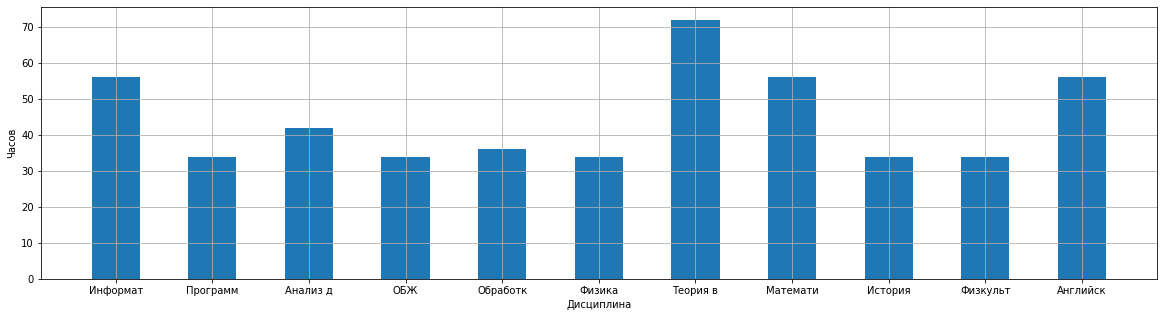

In [5]:
plt.figure(figsize=(20,5))
plt.bar(subjects["Название"].str[:8], subjects["Часов"], width=0.5)
plt.xlabel("Дисциплина")
plt.ylabel("Часов")
plt.grid();

<u>Обратите внимание</u>: использовался параметр *figsize=(20,5)*, позволяющий задавать соотношение сторон области построения диаграммы. Также использована функция *.str[ ]* из библиотеки Pandas, которая применяется к столбцу таблицы строкового типа и позволяет совершать строковые операции с содержимым столбца. В данном случае все значения столбца "Название" обрезаны по длине 8 символов для экономии места на горизонтальной оси диаграммы. Параметр *width* задает ширину столбца диаграммы. Попробуйте выполнить код в этой ячейке без функции *str* и с разными значениями *figsize* и *width*. Что изменилось?

<p style="font-size:125%">Вопрос 2. Гистограма распределения</p>
<p>Исследуем вопрос о том, как часто встречаются фамилии студентов определенной длины. Для этого построим гистограмму распределения числа букв в фамилиях.</p>

<p>Составим запрос, результатом которого является таблица с фамилиями всех студентов.</p>

In [6]:
s=select(student.c.surname)
result=conn.execute(s).fetchall()
print(result[:5])

[('Иванов',), ('Петров',), ('Сидоров',), ('Кузнецов',), ('Зайцева',)]


<p>Поместим результат в таблицу Pandas</p>

In [7]:
surnames=pd.DataFrame(result,columns=["Фамилия"])
surnames["Длина"]=surnames["Фамилия"].str.len()
surnames

,Фамилия,Длина
0,Иванов,6
1,Петров,6
2,Сидоров,7
3,Кузнецов,8
4,Зайцева,7
...,...,...
107,Киселев,7
108,Миронова,8
109,Павлов,6
110,Петров,6


<p>Построим гистограмму по числовому столбцу "Длина".</p>

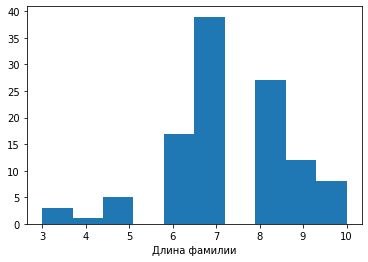

In [8]:
plt.figure(figsize=(6,4))
plt.hist(surnames["Длина"])
plt.xlabel("Длина фамилии");

Метод *.hist()* разбил диапазон количества букв (которое меняется от 3 до 10) на 10 интервалов по умолчанию. Ширина интервала меньше единицы, поэтому в некоторых интервалах мы видим пустоты. Это не является ошибкой. Уменьшим число интервалов до шести с помощью параметра *bins*.

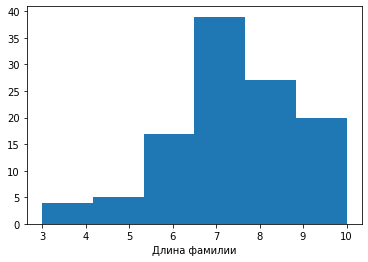

In [9]:
plt.figure(figsize=(6,4))
plt.hist(surnames["Длина"],bins=6)
plt.xlabel("Длина фамилии");

<p>Теперь в каждом интервале имеется число, соответствующее одному из значений столбца <i>Длина</i>, поэтому пустот нет. Аналогичный результат можно получить, применив к столбцу <i>Длина</i> функцию <i>value_counts()</i>.</p>

In [10]:
d=surnames["Длина"].value_counts(bins=6)
d

(6.5, 7.667]      39
(7.667, 8.833]    27
(8.833, 10.0]     20
(5.333, 6.5]      17
(4.167, 5.333]     5
(2.992, 4.167]     4
Name: Длина, dtype: int64

Функция *value_counts()* сортирует результат по убыванию. Результат мы поместили в переменную *d*. По своему типу *d* - это серия, состоящая из одного столбца с данными (39,27,20 ...) и массива индексных меток. Для построения столбчатой диаграммы достаточно вызвать встроенную в Pandas функцию *plot* с параметром *kind=bar*.

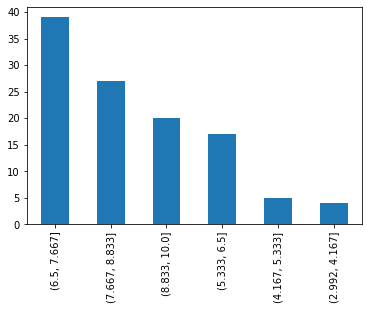

In [11]:
d.plot(kind="bar");

<p style="font-size:125%"> II. Домашнее задание</p>

<p style="font-size:125%"> Изучите структуру базы данных Chinook</p>

<img src="./Img/chinook_ERD.png">

БД Chinook содержит сведения о работе музыкальнрого Интернет-сервиса, аналогичного AppStore, в котором пользователи могут приобретать трэки, альбомы и составлять плейлисты. БД Chinook состоит из 11 таблиц:

- Таблица сотрудников хранит данные сотрудников, такие как идентификатор сотрудника, фамилия, имя и т. д. В ней также есть поле с именем ReportsTo, чтобы указать, кто кому подчиняется.
- В таблице клиентов хранятся данные о клиентах.
- Таблицы Invoice и InvoiceLine: в этих двух таблицах хранятся данные счетов. В таблице Invoice хранятся данные заголовка счета-фактуры, а в таблице InvoiceLine хранятся данные отдельных позиций счета-фактуры.
- В таблице исполнителей хранятся данные об артистах. Это простая таблица, содержащая только идентификатор и имя исполнителя.
- В таблице альбомов хранятся данные о названии альбома и имени исполнителя. Каждый альбом принадлежит одному исполнителю. Однако у одного исполнителя может быть несколько альбомов.
- В таблице MediaType хранятся типы мультимедиа, такие как аудиофайлы MPEG и аудиофайлы AAC.
- В таблице жанров хранятся типы музыки, такие как рок, джаз, металл и т. д.
- В таблице треков хранятся данные о песнях. Каждый трек принадлежит одному альбому.
- Таблицы Playlist и PlaylistTrack: таблица Playlist хранит данные о плейлистах. Каждый список воспроизведения содержит список треков. Каждый трек может принадлежать нескольким плейлистам. Связь между таблицей списков воспроизведения и таблицей треков - «многие ко многим». Таблица PlaylistTrack используется для отражения этой связи.

<p style="font-size:125%"> Создайте отображение БД Chinook</p>

In [12]:
from sqlalchemy import MetaData, Table, create_engine, select, and_, or_, not_, cast, String
from sqlalchemy.sql import func

engine = create_engine('sqlite:///Data/Chinook_Sqlite.sqlite')
metadata = MetaData()
metadata.reflect(bind=engine)
conn=engine.connect()
metadata.tables.keys()

dict_keys(['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'Track', 'MediaType', 'Playlist', 'PlaylistTrack'])

In [13]:
Album=Table("Album", metadata, autoload=True, autoload_with="engine")
Customer=Table("Customer", metadata, autoload=True, autoload_with="engine")
Track=Table("Track", metadata, autoload=True, autoload_with="engine")
Genre=Table("Genre", metadata, autoload=True, autoload_with="engine")
Invoice=Table("Invoice", metadata, autoload=True, autoload_with="engine")
InvoiceLine=Table("InvoiceLine", metadata, autoload=True, autoload_with="engine")

<p style="font-size:125%"> Выполните задания в Jupyter Notebook</p>

1. Составьте SQL-запрос, результатом выполнения которого станет список музыкальных жанров трэков, заказанных клиентами из Германии. Результат должен содержать один столбец с названиями жанров без повторов. Подсказка. В этом запросе учавствуют Genre, Track, InvoiceLine, Invoice, Customer. Свяжите эти таблицы по идентификаторам, например:
```
...
s=s.where(Customer.c.CustomerId==Invoice.c.CustomerId)
s=s.where(Invoice.c.InvoiceId==InvoiceLine.c.InvoiceId)
...
```
2. Сколько в БД *Chinook* трэков каждого из жанров "Blues", "Bossa Nova", "Comedy", "Soundtrack", "Heavy Metal", "Drama"?
3. Постройте столбчатую диаграмму (plt.bar), отражающую результаты задания № 2.
4. Сколько в БД *Chinook* трэков каждого из жанров, полученных в результате выполнения запроса № 1? Подсказка. используйте подзапрос. При необходимости повторите методический материал раздела 2.8 к семинарскому занятию от 28 октября.
5. Составьте запрос, результатом которого является таблица, содержащая число трэков в каждом альбоме, исключив из результата такие альбомы, в которых меньше двух и больше 50-ти треков. Подсказка. Для фильтрации результатов группировки используйте предложение HAVING. Результат должен содержать название альбома и число трэков в нём.
6. Поместите запрос из задания № 5 в таблицу Pandas. Постройте гистограму распределния (plt.hist) числа треков.

Результат выполненных заданий в файле Jupyter Notebook направьте преподавателю на почту. Сверху в ячейке Markdown укажите Фамилию, имя, учебную группу.